In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

#read data
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

## Functions

In [2]:
def to_season(month):
    '''
    Convert month to season by [winter, spring, summer, fall] -> [0,1,2,3]
    '''
    if month in [12,1,2]:
        return 0
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    else: 
        return 3

In [3]:
def convert_to_yyyymmdd(dataframe, column_name, seperator = '-', date_formate : list = ['year', 'month', 'day'], drop_org = False):
    '''
    seperator is the charactor that seperate day, month, year in the original column
    date_formats gives a list with the order of year, month, day of original column
    drop_org gives whether the function needs to 
    '''
    for i, form in enumerate(date_formate): 
        dataframe[form] = dataframe[column_name].apply(lambda date: date.split(seperator)[i])
    dataframe['season'] = dataframe['month'].apply(lambda month: to_season(int(month)))
    if drop_org:
        dataframe.drop(column_name)
    return dataframe

## A look of the data

### In Calendar file, there are 3181 lodging with records from 2016-01-04 to 2017-01-02
price would be NaN if available is f


In [4]:
calendar.head() 
calendar.date.value_counts().sort_index() #find the date range and lodging amount

2016-01-04    3818
2016-01-05    3818
2016-01-06    3818
2016-01-07    3818
2016-01-08    3818
              ... 
2016-12-29    3818
2016-12-30    3818
2016-12-31    3818
2017-01-01    3818
2017-01-02    3818
Name: date, Length: 365, dtype: int64

In [5]:
calendar = convert_to_yyyymmdd(calendar, 'date').drop('listing_id', axis = 1)

In [6]:
calendar['season'].value_counts()

1    351256
2    351256
3    347438
0    343620
Name: season, dtype: int64

In [7]:
#replace available variable to 0 / 1
calendar['available'] = calendar['available'].apply(lambda x:1 if x=='t' else 0) 

In [8]:
calendar_available_permonth = calendar.groupby('month').mean('available')
calendar_available_permonth.reset_index(inplace=True)

##### A line plot showing the trend of available rate over months

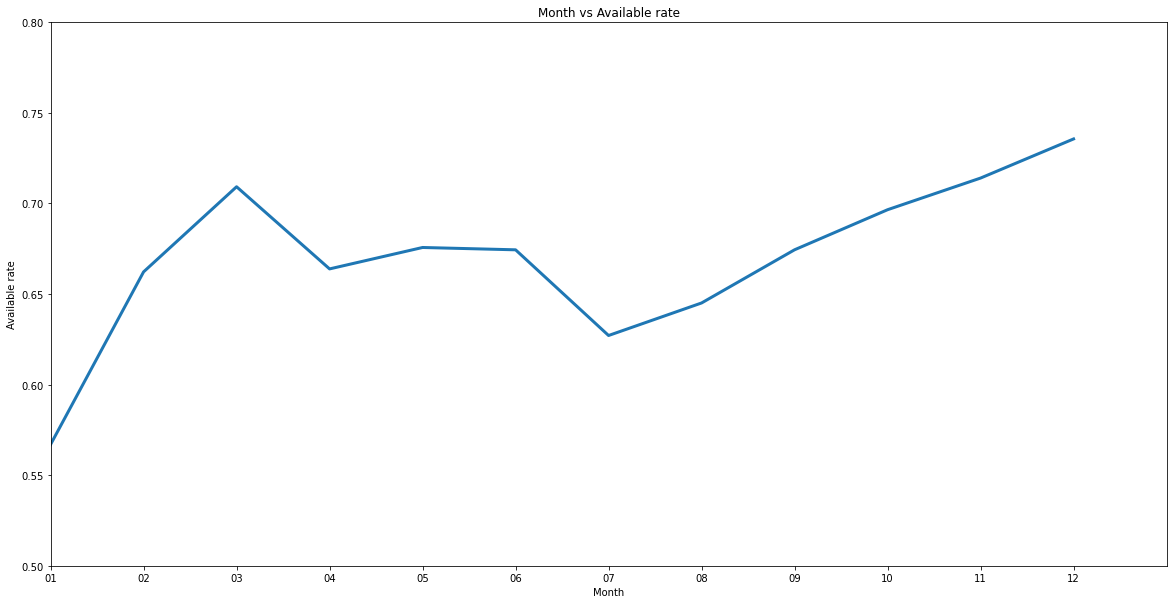

In [9]:
plt.figure(figsize=(20, 10))
x = calendar_available_permonth['month']
y = calendar_available_permonth['available']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month', )
plt.ylabel('Available rate')
plt.title('Month vs Available rate')
plt.axis([0, 12, 0.5, 0.8])
plt.grid(False)
plt.show()

In [10]:
calendar_available_perseason = calendar.groupby('season').mean('available')
calendar_available_perseason.reset_index(inplace=True)
calendar_available_perseason

,season,available
0,0,0.655721
1,1,0.683109
2,2,0.648567
3,3,0.694984


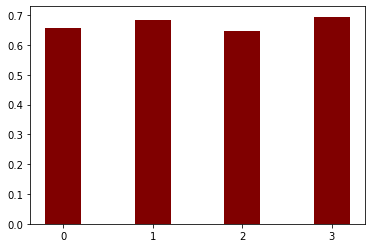

In [30]:
x = calendar_available_perseason.season
xi = list(range(len(x)))
y = calendar_available_perseason.available
plt.bar(xi, y, color ='maroon', width = 0.4)
plt.xticks(np.arange(0, 4, step=1))
plt.show()